<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting Google Play Store Ratings </h3> </center>
<center><h4> Stanley Wu and Patrick Yoon </h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
* Describe the problem you would like to tackle. 
* What is the topic of your project? 
* What do you want to learn about it?

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* **(optional)** Has there been previous work on your topic in terms of applying ML techniques to analyze similar datasets? Do some research into your topic. What algorithms were used? What was the performance of those algorithms? Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Questions/Hypothesis
* End this section with a list of questions and hypotheses
* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms (at least three) in predicting/classifying your target variable from your features variables.
* You should have at least one hypothesis regarding the relationship between two variables, which may be different from your ML problem.



While this section provides bullet points as prompts, your Introduction should consist of coherent paragraphs. As noted in the rubric, you are required delete all the prompts from this template, except for headings. Failing to do so will result in substantial point deductions.

**Problem Statement:**

We want to analyze data about applications from the Google Play Store in order to find the factors that have the most effect on the rating (out of five) presented on the Google Play Store. Potential factors include category, genre, number of installs, and the number of reviews. We plan on using these factors as features to predict the rating of an application. With this, we can learn about which features are more significant in determining the rating and in what way.

**Significance of the Problem:**

As a platform for creating applications for use on phones, there are many features of a Google Play Application, ranging from average rating among users, genre, and download count, to name a few. With phones being such an important part of daily life (and Google Play Store supplying applications to a large majority of phone users), it is important to understand not only how current applications have faired on the market, but also what features distinguish good apps from bad apps, which allow us and developers to hone in on certain features of applications during development to improve user experience and popularity for new applications. 

Another person has conducted a similar experiement has us while using the same dataset from Kaggle. You can click [here](https://www.kaggle.com/jemseow/machine-learning-to-predict-app-ratings) to read about it. This person opted into using three models: linear regression, the SVR model, and the random forest regressor model.

**Questions:**

Given the aforementioned problem and its importance, we set out to tackle the following questions:
- Which process will yield the best results: classification or regression?
    - Using our ratings target variable as continuous values or discretizing them for classification
    - Whether leaving the target as a continuous variable for regression will yield better results than doing some pre-processing to turn this into a classification problem
- Which algorithms will have the easiest time fitting to the data?
    - KNN, decision trees, LinearSVC
- Which algorithm will end up with the highest testing accuracy?
- What is the difference in performance between decision trees and KNN?
    - This is important due to our large number of features being used
    - KNN usually does better on datasets with less features
    - Decision trees might have an easier time because there are more

**Hypothesis:**

For hypothesis testing, we will be testing if a higher number of installs means that the rating is also higher. We will also be testing if a lower number of reviews means that the rating will be higher. By using various classification and regression algorithms, we will be able to answer the questions mentioned above and test our hypothesis. These questions and their respective answers will help us as developers and data analysis to see whether popularity or urge to write a review necessarily constitutes to a higher rating. 


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1 Data Acquisition
We obtained our data from kaggle:
-	https://www.kaggle.com/lava18/google-play-store-apps

This dataset provides information about applications on the Google Play Store. This includes the application name, category, rating (out of 5), number of reviews, size (in M), number of installs, price, content rating, genre, date of last update, current version, and the required android version to run the application. This results in 13 columns. There are exactly 10841 applications in the dataset, resulting in 10841 rows of data.

### 2.2 Data Analysis
In relation to our hypothesis, our independent variables are the ten out of the eleven feature variables stated above: name, category, number of reviews, size (in M), number of installs, price, content rating, genre, date of last update, current version, and the required android version to run the application. Our outcome variable will be the rating, which is a value between 1 and 5. We plan on testing the results between classification (the rating will be a discrete number between 1-5) or regression (the rating will be a continuous number between 1-5).

We deem our feature variables as important predictors as these characteristics define the activity and the quality of an application on the Google Play Store. Features such as genre and category are important as people's rating may change depending on the type of application it functions as. Other features such as the number of installs and reviews may also be important as the average rating may vary more with less number of users using/reviewing it. This is a supervised ML problem because we have our ten features as inputs and mapping it to a single output, the rating. As stated previously, we plan on testing both classification and regression as our target variable allows it. As for the machine learning algorithms, for classification we plan on using Classification K-Nearest Neighbors (KNN), classification decision tree, and LinearSVC model. For regression, we plan on using Regression K-Nearest Neighbors, regression decision tree, and LinearSVR model. We decided on these algorithms as they are comparatively cheap, easy, and quick to implement. Since we are testing so many different algorithms and testing both regression and classification, we want to use algorithms that can evaluate the performance quickly with good accuracy.

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a **separate** script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset (i.e., what it is about) and the number of variables/rows included.


### 2.2. Data Analysis
* For your hypotheses, what are your IVs and DVs?
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables? Why do you think those are important predictors?
* Describe why this is a supervised ML problem and identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? **Why?** You should compare at least three algorithms.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


We import or google play store csv, and show it's initial shape and some of its contents

In [68]:
import pandas as pd

df = pd.read_csv('googleplaystore.csv')
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We drop rows that are missing values, and reset the index (this will be important later when we do some joining). We then also remove some features that have little to do comparisons between applications. This includes the version (game dependent), genre (covered in more detail in category), the day it was last updated (game dependent), and size (game dependent). 

In [69]:
df = df.dropna()
df = df.reset_index()
df = df.drop(['index', 'Current Ver', 'Genres', 'Last Updated', 'Size'], axis=1)
df.shape

(9360, 9)

Since we have a lot of categorical columns, we write a function that onehot encodes a given dataframe's specific column as provided, and returns the newly joined dataset with one hot encoded features. We do this for 'Category', 'Type', 'Content Rating', and 'Android Ver'. These are most of our non continuous features. We then do some data massaging to get turn the features 'Installs' and 'Price' into continuous values (they were originally strings with symbols).

In [70]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_col(df, col):
    new_df = df[col].values.reshape(-1,1)
    encoder = OneHotEncoder(sparse=False)
    encoded_df = encoder.fit_transform(new_df)
    
    features_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names())
    df = df.drop([col], axis=1)
    return df.join(features_df)

In [71]:
df['Installs'] = [int(x.replace('+', '').replace(',', '')) for x in df['Installs']]
df['Price'] = [float(x.replace('$', '')) for x in df['Price']]
for col in ['Category', 'Type', 'Content Rating', 'Android Ver']:
    df = onehot_encode_col(df, col)

df.head()

,App,Rating,Reviews,Installs,Price,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,...,x0_5.0 - 6.0,x0_5.0 - 8.0,x0_5.0 and up,x0_5.1 and up,x0_6.0 and up,x0_7.0 - 7.1.1,x0_7.0 and up,x0_7.1 and up,x0_8.0 and up,x0_Varies with device
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Coloring book moana,3.9,967,500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,5000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sketch - Draw & Paint,4.5,215644,50000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we plan on doing regression AND classificaiton, we make two different sets of training/validation/testing data. In the regression case, we keep the target as a continuous feature, and in the classification case, we split the target ratings into a binary classification (1 for above median value, 0 for less than). This allows us to create a 50 50 split in data, ensuring we won't overfit to one category, and giving us a measurement of above average and below average. For both sets of data, we apply a min max scaler over the continuous features/target (notice we only apply this to the feature in the regression case. 

In [72]:
df_regr = df.copy()

In [73]:
features = df_regr.drop(['App', 'Rating'], axis=1)
target = df['Rating']

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(features, target, train_size=0.8, random_state=3000)
X_train_regr, X_val_regr, y_train_regr, y_val_regr = train_test_split(X_train_regr, y_train_regr, train_size=0.75, random_state=3000)

#create the scaler
scaler = MinMaxScaler()
scaler.fit(X_train_regr[['Reviews', 'Installs', 'Price']])

X_train_regr[['Reviews', 'Installs', 'Price']] = scaler.transform(X_train_regr[['Reviews', 'Installs', 'Price',]])
X_val_regr[['Reviews', 'Installs', 'Price']] = scaler.transform(X_val_regr[['Reviews', 'Installs', 'Price']])
X_test_regr[['Reviews', 'Installs', 'Price']] = scaler.transform(X_test_regr[['Reviews', 'Installs', 'Price']])

scaler = MinMaxScaler()
scaler.fit(np.array(y_train_regr).reshape(-1, 1))

y_train_regr = scaler.transform(np.array(y_train_regr).reshape(-1, 1))
y_val_regr = scaler.transform(np.array(y_val_regr).reshape(-1, 1))
y_test_regr = scaler.transform(np.array(y_test_regr).reshape(-1, 1))

X_train_regr.head()

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Reviews,Installs,Price,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,x0_COMICS,x0_COMMUNICATION,...,x0_5.0 - 6.0,x0_5.0 - 8.0,x0_5.0 and up,x0_5.1 and up,x0_6.0 and up,x0_7.0 - 7.1.1,x0_7.0 and up,x0_7.1 and up,x0_8.0 and up,x0_Varies with device
2858,2.973734e-03,0.005000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2514,7.946688e-02,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,1.215482e-06,0.000005,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,3.710418e-07,0.000010,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,2.334493e-04,0.000100,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As for feature selection, we use Model-Based Feature Selection to select the featuers with most importance based on the DecisionTreeRegressor. Since this dataset will be used for regression, we use a regressor as the model to select features from.

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

select = SelectFromModel(DecisionTreeRegressor(random_state=3000), threshold='median')
select.fit(X_train_regr, y_train_regr)

#transform training and testing sets so only the selected features are retained
X_train_selected_regr = select.transform(X_train_regr)
X_val_selected_regr = select.transform(X_val_regr)
X_test_selected_regr = select.transform(X_test_regr)

In [76]:
print(features.columns[select.get_support()])

Index(['Reviews', 'Installs', 'Price', 'x0_AUTO_AND_VEHICLES', 'x0_BUSINESS',
       'x0_COMMUNICATION', 'x0_DATING', 'x0_FAMILY', 'x0_FINANCE',
       'x0_FOOD_AND_DRINK', 'x0_GAME', 'x0_HEALTH_AND_FITNESS', 'x0_LIFESTYLE',
       'x0_MEDICAL', 'x0_NEWS_AND_MAGAZINES', 'x0_PERSONALIZATION',
       'x0_PHOTOGRAPHY', 'x0_PRODUCTIVITY', 'x0_SHOPPING', 'x0_SOCIAL',
       'x0_SPORTS', 'x0_TOOLS', 'x0_TRAVEL_AND_LOCAL', 'x0_Paid',
       'x0_Everyone', 'x0_Everyone 10+', 'x0_Teen', 'x0_2.2 and up',
       'x0_2.3 and up', 'x0_2.3.3 and up', 'x0_4.0 and up', 'x0_4.0.3 and up',
       'x0_4.1 and up', 'x0_4.2 and up', 'x0_4.3 and up', 'x0_4.4 and up',
       'x0_5.0 and up', 'x0_Varies with device'],
      dtype='object')


For our classification dataset, we must first transform our continuous features to discrete 1 and 0s. We do this by mapping ratings above the median to 1, and below to 0. Ensuring 50 50 split and giving us a metric of above average and below average apps.

In [77]:
target = df['Rating']

def transform_class(target):
    res = []
    
    for rating in target:
        if rating < target.median():
            res.append(0)
        else:
            res.append(1)
    return res

target = transform_class(target)

Again, we do training/validation/testing split, and again perform a min max scaler over our continuous features, but not the y value this time, since it is no longer continuous.

In [78]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, target, train_size=0.8, random_state=3000)
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_train_class, y_train_class, train_size=0.75, random_state=3000)

#create the scaler
scaler = MinMaxScaler()
scaler.fit(X_train_class[['Reviews', 'Installs', 'Price']])

X_train_class[['Reviews', 'Installs', 'Price']] = scaler.transform(X_train_class[['Reviews', 'Installs', 'Price']])
X_val_class[['Reviews', 'Installs', 'Price']] = scaler.transform(X_val_class[['Reviews', 'Installs', 'Price']])
X_test_class[['Reviews', 'Installs', 'Price']] = scaler.transform(X_test_class[['Reviews', 'Installs', 'Price']])

X_train_class.head()

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Reviews,Installs,Price,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,x0_COMICS,x0_COMMUNICATION,...,x0_5.0 - 6.0,x0_5.0 - 8.0,x0_5.0 and up,x0_5.1 and up,x0_6.0 and up,x0_7.0 - 7.1.1,x0_7.0 and up,x0_7.1 and up,x0_8.0 and up,x0_Varies with device
2858,2.973734e-03,0.005000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2514,7.946688e-02,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,1.215482e-06,0.000005,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,3.710418e-07,0.000010,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,2.334493e-04,0.000100,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, since we are performing classification, we will be using DecisionTreeClassifier to select our features with Model-Based Feature Selection.

In [79]:
from sklearn.tree import DecisionTreeClassifier

select = SelectFromModel(DecisionTreeClassifier(random_state=3000), threshold='median')
select.fit(X_train_class, y_train_class)

#transform training and testing sets so only the selected features are retained
X_train_selected_class = select.transform(X_train_class)
X_val_selected_class = select.transform(X_val_class)
X_test_selected_class = select.transform(X_test_class)

In [80]:
print(features.columns[select.get_support()])

Index(['Reviews', 'Installs', 'Price', 'x0_BOOKS_AND_REFERENCE', 'x0_BUSINESS',
       'x0_COMMUNICATION', 'x0_DATING', 'x0_FAMILY', 'x0_FINANCE', 'x0_GAME',
       'x0_HEALTH_AND_FITNESS', 'x0_LIFESTYLE', 'x0_MAPS_AND_NAVIGATION',
       'x0_MEDICAL', 'x0_NEWS_AND_MAGAZINES', 'x0_PERSONALIZATION',
       'x0_PHOTOGRAPHY', 'x0_PRODUCTIVITY', 'x0_SHOPPING', 'x0_SPORTS',
       'x0_TOOLS', 'x0_TRAVEL_AND_LOCAL', 'x0_Free', 'x0_Everyone',
       'x0_Everyone 10+', 'x0_Mature 17+', 'x0_Teen', 'x0_2.2 and up',
       'x0_2.3 and up', 'x0_2.3.3 and up', 'x0_4.0 and up', 'x0_4.0.3 and up',
       'x0_4.1 and up', 'x0_4.2 and up', 'x0_4.3 and up', 'x0_4.4 and up',
       'x0_5.0 and up', 'x0_Varies with device'],
      dtype='object')


### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


We have three features that were quantitative data, thus not requiring one-hot encoding. These features are the number of reviews, the number of installs, and the price. Therefore, we plotted each of these features against the rating using a regression plot to visualize any effects

Text(0.5, 1.0, 'Number of Reviews vs. Rating')

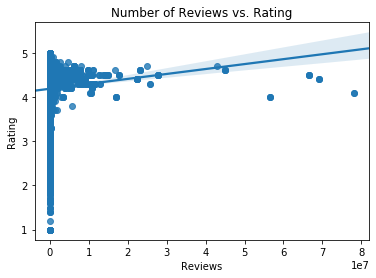

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

regress_df = df.copy()
regress_df['Reviews'] = df['Reviews'].astype('int64')

sns.regplot(data=regress_df, x = "Reviews", y="Rating").set_title("Number of Reviews vs. Rating")

As we can see, there are many outliers to this graph, with very little points past the third tic. This skews the data as it is hard to tell what is going on within the cluster.

Text(0.5, 1.0, 'Number of Reviews vs. Rating')

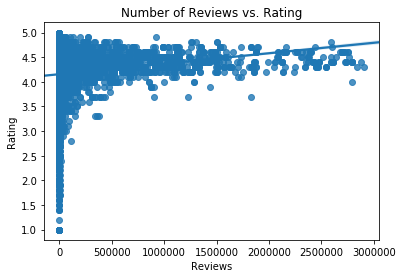

In [82]:
regress_small_df = regress_df.nsmallest(9000, ['Reviews'])
sns.regplot(data=regress_small_df, x = "Reviews", y="Rating").set_title("Number of Reviews vs. Rating")

Looking at the graph closer, we can see that there is a subtle positive relationship between the rating and the number of reviews. Another thing to notice is the range in ratings for when the number of reviews is extremely small. This is likely due to lesser popular apps having varying ratings due to there being such a small number of reviews

Text(0.5, 1.0, 'Number of Installs vs. Rating')

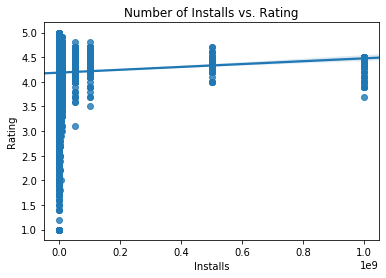

In [83]:
sns.regplot(data=regress_df, x = "Installs", y="Rating").set_title("Number of Installs vs. Rating")

As we can see here, there is also a subtle positive relationship between the number of installs and the rating. This is likely due to more popular applications having much more installs. Similar to the number of ratings, there is a great variance in rating when there are little installs, likely due to the average rating being easily swayed.

Text(0.5, 1.0, 'Price vs. Rating')

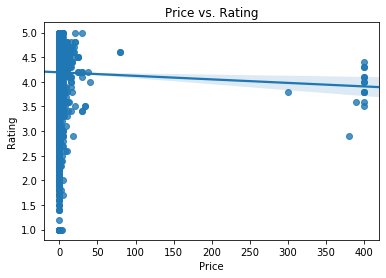

In [84]:
sns.regplot(data=regress_df, x = "Price", y="Rating").set_title("Price vs. Rating")

As we can see here, there is a subtle negative relationship between the price and the rating, but there are also a lot of outliers.

Text(0.5, 1.0, 'Price vs. Rating')

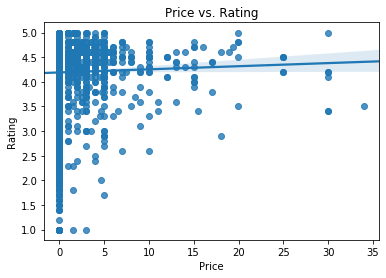

In [85]:
regress_small_df = regress_df.nsmallest(9340, ['Price'])
sns.regplot(data=regress_small_df, x = "Price", y="Rating").set_title("Price vs. Rating")

However, once we zoom in more, we can see that it's hard to distinguish any relationship between the price and rating. Just like the last two, there is a large variance when the prie is at zero.

We have many features that are categorical data, so we had to use one-hot encoding to be able to run a machine learning algorithm through them. In order to visualize their effects onto a graph, we need to know the frequency for each category in the categorical data. We will first visualize the effect of the category of the application on the rating.


Here we create a dictionary for each category and their frequency.

In [86]:
cols = [0, 1, 2, 3, 4] + list(range(38, 77))
category_df = df.drop(df.columns[cols], axis=1)

categories = {}
for category in category_df.columns:
    total = 0
    for i in range(len(category_df)):
        if category_df[category].iloc[i] == 1:
            total += 1
    categories[category] = total
    
categories

{'x0_ART_AND_DESIGN': 61,
 'x0_AUTO_AND_VEHICLES': 73,
 'x0_BEAUTY': 42,
 'x0_BOOKS_AND_REFERENCE': 178,
 'x0_BUSINESS': 303,
 'x0_COMICS': 58,
 'x0_COMMUNICATION': 328,
 'x0_DATING': 195,
 'x0_EDUCATION': 155,
 'x0_ENTERTAINMENT': 149,
 'x0_EVENTS': 45,
 'x0_FAMILY': 1746,
 'x0_FINANCE': 323,
 'x0_FOOD_AND_DRINK': 109,
 'x0_GAME': 1097,
 'x0_HEALTH_AND_FITNESS': 297,
 'x0_HOUSE_AND_HOME': 76,
 'x0_LIBRARIES_AND_DEMO': 64,
 'x0_LIFESTYLE': 314,
 'x0_MAPS_AND_NAVIGATION': 124,
 'x0_MEDICAL': 350,
 'x0_NEWS_AND_MAGAZINES': 233,
 'x0_PARENTING': 50,
 'x0_PERSONALIZATION': 312,
 'x0_PHOTOGRAPHY': 317,
 'x0_PRODUCTIVITY': 351,
 'x0_SHOPPING': 238,
 'x0_SOCIAL': 259,
 'x0_SPORTS': 319,
 'x0_TOOLS': 733,
 'x0_TRAVEL_AND_LOCAL': 226,
 'x0_VIDEO_PLAYERS': 160,
 'x0_WEATHER': 75}

Since there are many categories, we picked the categories with the three highest frequencies.

In [87]:
from collections import Counter 
top_3_categories = Counter(categories).most_common(3)
top_3_categories

[('x0_FAMILY', 1746), ('x0_GAME', 1097), ('x0_TOOLS', 733)]

In [88]:
import plotly.express as px

category_df['Rating'] = df['Rating']

for category_tuple in top_3_categories:
    category = category_tuple[0]
    fig = px.box(category_df, x = category, y = "Rating")
    fig.update_layout (
        title = {'text': category[3:] + ' vs. Rating', 'yanchor': 'top'})

<img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/familybox.png?raw=true" alt="img/familybox.jpg" width=700>
<img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/gamebox.png?raw=true" alt="img/familybox.jpg" width=700>
<img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/toolsbox.png?raw=true" alt="img/familybox.jpg" width=700>

These three box plots display the effect of an application's genre on the rating on the Google Play Store. For each genre, two box plots are displayed. One for the distribution of applications falling under that specific genre and one for the applications that do not fall under that specific genre (This is representative of the one hot encoding we applied). These were the three most frequent categories in our dataset, consisting of Family, Game, and Tools. As we can see, none of the figures above led to a significant diffference in the rating.

Now we will do this with the other features that are one hot encoded: Paid/Free, Content Rating, and Android Version

In [89]:
# Paid/Free
paid_free_df = df.iloc[:, 38:40]

paid_frees = {}
for paid_free in paid_free_df.columns:
    total = 0
    for i in range(len(paid_free_df)):
        if paid_free_df[paid_free].iloc[i] == 1:
            total += 1
    paid_frees[paid_free] = total

top_3_paid_free = Counter(paid_frees).most_common(3)

# Content Rating
content_rating_df = df.iloc[:, 40:46]
content_ratings = {}
for content_rating in content_rating_df.columns:
    total = 0
    for i in range(len(content_rating_df)):
        if content_rating_df[content_rating].iloc[i] == 1:
            total += 1
    content_ratings[content_rating] = total

top_3_content_rating = Counter(content_ratings).most_common(3)

# Android Version
cols = list(range(46))
android_ver_df = df.drop(df.columns[cols], axis=1)

android_vers = {}
for android_ver in android_ver_df.columns:
    total = 0
    for i in range(len(android_ver_df)):
        if android_ver_df[android_ver].iloc[i] == 1:
            total += 1
    android_vers[android_ver] = total
    
top_3_android_ver = Counter(android_vers).most_common(3)

In [90]:
paid_free_df['Rating'] = df['Rating']
content_rating_df['Rating'] = df['Rating']
android_ver_df['Rating'] = df['Rating']

for paid_free_tuple in top_3_paid_free:
    paid_free = paid_free_tuple[0]
    fig = px.box(paid_free_df, x = paid_free, y = "Rating")
    fig.update_layout (
        title = {'text': paid_free[3:] + ' vs. Rating', 'yanchor': 'top'})
    
for content_rating_tuple in top_3_content_rating:
    content_rating = content_rating_tuple[0]
    fig = px.box(content_rating_df, x = content_rating, y = "Rating")
    fig.update_layout (
        title = {'text': content_rating[3:] + ' vs. Rating', 'yanchor': 'top'})
    
for android_ver_tuple in top_3_android_ver:
    android_ver = android_ver_tuple[0]
    fig = px.box(android_ver_df, x = android_ver, y = "Rating")
    fig.update_layout (
        title = {'text': android_ver[3:] + ' vs. Rating', 'yanchor': 'top'})

<table>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/freebox.png?raw=true" alt="img/freebox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/paidbox.png?raw=true" alt="img/paidbox.png" width=600>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/everyonebox.png?raw=true" alt="img/everyonebox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/teenbox.png?raw=true" alt="img/teenbox.png" width=600>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/maturebox.png?raw=true" alt="img/maturebox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/4.1box.png?raw=true" alt="img/4.1box.png" width=600>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/variesbox.png?raw=true" alt="img/variesbox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/4.0.3box.png?raw=true" alt="img/4.0.3box.png" width=600>
        </td>
    </tr>
</table>

As we can see again, none of the features by themselves have a significance difference on the rating.

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

#### Hypothesis Test

We will be conducting two separate hypothesis test on the relationship between Installs and Rating and Reviews and Rating. We decided to conduct a One-Way ANOVA test. In order to conduct this test, we need to make the ratings discrete. Here below, we prepare our dataframe for the hypothesis tests.

In [91]:
install_df = pd.DataFrame(columns = ["App", "Installs", "Rating"])
install_df["App"] = df["App"]
install_df["Installs"] = df["Installs"]
install_df["Rating"] = df["Rating"].apply(lambda x: int(x))

install_df

,App,Installs,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,4
1,Coloring book moana,500000,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,4
3,Sketch - Draw & Paint,50000000,4
4,Pixel Draw - Number Art Coloring Book,100000,4
...,...,...,...
9355,FR Calculator,500,4
9356,Sya9a Maroc - FR,5000,4
9357,Fr. Mike Schmitz Audio Teachings,100,5
9358,The SCP Foundation DB fr nn5n,1000,4


In [92]:
review_df = pd.DataFrame(columns = ["App", "Reviews", "Rating"])
review_df["App"] = df["App"]
review_df["Reviews"] = df["Reviews"].astype('int64')
review_df["Rating"] = df["Rating"].apply(lambda x: int(x))

review_df

,App,Reviews,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,4
1,Coloring book moana,967,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,4
3,Sketch - Draw & Paint,215644,4
4,Pixel Draw - Number Art Coloring Book,967,4
...,...,...,...
9355,FR Calculator,7,4
9356,Sya9a Maroc - FR,38,4
9357,Fr. Mike Schmitz Audio Teachings,4,5
9358,The SCP Foundation DB fr nn5n,114,4


Now we can create a dataset with the descriptive statistics for each of the ratings.

In [93]:
descriptives_installs = install_df.groupby("Rating").agg(["count", "mean", "std", "sem"])
descriptives_installs = descriptives_installs["Installs"]

descriptives_installs

,count,mean,std,sem
Rating,,,,
1,56,2.065134e+04,7.062855e+04,9.438137e+03
2,231,1.150723e+05,4.968414e+05,3.268976e+04
3,1710,5.458339e+06,5.959994e+07,1.441278e+06
4,7089,2.232534e+07,1.002981e+08,1.191243e+06
5,274,3.285511e+02,8.373118e+02,5.058385e+01


In [94]:
descriptives_reviews = review_df.groupby("Rating").agg(["count", "mean", "std", "sem"])
descriptives_reviews = descriptives_reviews["Reviews"]

descriptives_reviews

,count,mean,std,sem
Rating,,,,
1,56,187.160714,5.012819e+02,66.986608
2,231,1126.471861,7.440650e+03,489.558855
3,1710,24796.440936,1.685116e+05,4075.037975
4,7089,673140.211031,3.598545e+06,42739.990109
5,274,8.740876,1.617494e+01,0.977164


Here we can see the various descriptive statistics for each rating. This is for both installs and reviews.

Now, we can start visualizing these statistics using a bar graph.

In [95]:
descriptives_installs.reset_index(inplace=True)
descriptives_reviews.reset_index(inplace=True)

descriptives_installs

,Rating,count,mean,std,sem
0,1,56,2.065134e+04,7.062855e+04,9.438137e+03
1,2,231,1.150723e+05,4.968414e+05,3.268976e+04
2,3,1710,5.458339e+06,5.959994e+07,1.441278e+06
3,4,7089,2.232534e+07,1.002981e+08,1.191243e+06
4,5,274,3.285511e+02,8.373118e+02,5.058385e+01


In [96]:
graph_installs = px.bar(descriptives_installs, x = "Rating", y = "mean", error_y = "sem", template='none', width=500, labels = {"mean": "Number of Installs", "Rating": "Rating"})

graph_installs.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_installs.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_installs.update_layout(title = {'text': "Number of Installs per Rating"})


graph_reviews = px.bar(descriptives_reviews, x = "Rating", y = "mean", error_y = "sem", template='none', width=500, labels = {"mean": "Number of Reviews", "Rating": "Rating"})

graph_reviews.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_reviews.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_reviews.update_layout(title = {'text': "Number of Reviews per Rating"})



<table>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/installsbar.png?raw=true" alt="img/installsbar.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/reviewsbar.png?raw=true" alt="img/reviewsbar.png" width=600>
        </td>
    </tr>
</table>

Now that we have visualized the data, we can start conducting the F-Test to evaluate our data.

In [97]:
from scipy import stats

installs_1 = install_df[install_df["Rating"] == 1]["Installs"]
installs_2 = install_df[install_df["Rating"] == 2]["Installs"]
installs_3 = install_df[install_df["Rating"] == 3]["Installs"]
installs_4 = install_df[install_df["Rating"] == 4]["Installs"]
installs_5 = install_df[install_df["Rating"] == 5]["Installs"]

groups_installs = [installs_1, installs_2, installs_3, installs_4, installs_5]

reviews_1 = review_df[review_df["Rating"] == 1]["Reviews"]
reviews_2 = review_df[review_df["Rating"] == 2]["Reviews"]
reviews_3 = review_df[review_df["Rating"] == 3]["Reviews"]
reviews_4 = review_df[review_df["Rating"] == 4]["Reviews"]
reviews_5 = review_df[review_df["Rating"] == 5]["Reviews"]

groups_reviews = [reviews_1, reviews_2, reviews_3, reviews_4, reviews_5]

results_installs = stats.f_oneway(*groups_installs)
f_stat_installs = results_installs[0]
p_val_installs = results_installs[1]

print("F-statistic for Installs", format(f_stat_installs, '.2f'))
print("P-value for Installs", format(p_val_installs, '.2f'))

results_reviews = stats.f_oneway(*groups_reviews)
f_stat_reviews = results_reviews[0]
p_val_reviews = results_reviews[1]

print("\nF-statistic for Reviews", format(f_stat_reviews, '.2f'))
print("P-value for Reviews", format(p_val_reviews, '.2f'))

F-statistic for Installs 17.60
P-value for Installs 0.00

F-statistic for Reviews 18.76
P-value for Reviews 0.00


Now we must calculate the degrees of freedom for both groups in order to use them for later evaluations

In [98]:
df1_installs = len(descriptives_installs) - 1
df2_installs = 0

for group in groups_installs:
    df2_installs += (len(group) - 1)

print("df1 for Installs:", df1_installs)
print("df2 for Installs:", df2_installs)

df1_reviews = len(descriptives_reviews) - 1
df2_reviews = 0

for group in groups_reviews:
    df2_reviews += (len(group) - 1)

print("df1 for Reviews:", df1_reviews)
print("df2 for Reviews:", df2_reviews)

df1 for Installs: 4
df2 for Installs: 9355
df1 for Reviews: 4
df2 for Reviews: 9355


Before moving forward, we need to conduct two assumption checks for each test: the check for equality of variances and the check for normality. Here is the check for equality of variances:

In [99]:
levene_results_installs = stats.levene(*groups_installs)
print(levene_results_installs)

levene_results_reviews = stats.levene(*groups_reviews)
print(levene_results_reviews)

LeveneResult(statistic=17.331581104688066, pvalue=3.5529510578722434e-14)
LeveneResult(statistic=18.637480369218586, pvalue=2.8537100534479524e-15)


Since both p-values are less than 0.05, both assumption checks fail. Now we check normality:

In [100]:
print("Installs:")
for i in range(len(groups_installs)):
    print("\tRating", i+1, stats.shapiro(groups_installs[i]), "\n")
    
print("Reviews:")
for i in range(len(groups_reviews)):
    print("\tRating", i+1, stats.shapiro(groups_reviews[i]), "\n")

Installs:
	Rating 1 (0.30269527435302734, 7.612390129059857e-15) 

	Rating 2 (0.21413445472717285, 4.503244002519923e-30) 

	Rating 3 (0.05598461627960205, 0.0) 

	Rating 4 (0.20740395784378052, 0.0) 

	Rating 5 (0.330822229385376, 1.9975241331206778e-30) 

Reviews:
	Rating 1 (0.4078948497772217, 1.1124462489424738e-13) 

	Rating 2 (0.11550748348236084, 1.898537399530024e-31) 

	Rating 3 (0.10504364967346191, 0.0) 

	Rating 4 (0.16428852081298828, 0.0) 

	Rating 5 (0.45398974418640137, 4.207868520476938e-28) 



C:\Users\Stanley Wu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



Our assumption checks failed for both tests. No p-values were above 0.05. The one-way ANOVA is said to be robust enough to handle the violations of assumption of normality. However, we cannot proceed with the analysis as it did not pass our assumpion of for equality of variances.

#### Conclusions for Hypothesis Tests
**Installs**
A one-way analysis of variance (ANOVA) was conducted to examine the effect of an application's rating on its number of installs. We ran our test on applications from a Google Play Store using a dataset, thus these applications and their respective number of installs were randomly chosen.

The results were inconclusive. The F-test results were F(4, 9355) = 17.60, p < 0.05. This result may deem the difference as statistically significant. However, the data failed both the assumption check for equality of variance and the assumption check for normality. The assumption check for normality may allow us to continue our test due to the one-way ANOVA being robust enough. However, we decided to not proceed with our test due to the test not passing the assumption check for equality of variance. Therefre, we did not conduct any post-hoc tests on this data. Since the results are inconclusive, they do not indicate anything about our data.

**Reviews**
A one-way analysis of variance (ANOVA) was conducted to examine the effect of an application's rating on its number of reviews. We ran our test on applications from a Google Play Store using a dataset, thus these applications and their respective number of reviews were randomly chosen.

The results were inconclusive. The F-test results were F(4, 9355) = 18.76, p < 0.05. This result may deem the difference as statistically significant. However, the data failed both the assumption check for equality of variance and the assumption check for normality. The assumption check for normality may allow us to continue our test due to the one-way ANOVA being robust enough. However, we decided to not proceed with our test due to the test not passing the assumption check for equality of variance. Therefre, we did not conduct any post-hoc tests on this data. Since the results are inconclusive, they do not indicate anything about our data.

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

def grid_search_kNN():
    param_grid = {'n_neighbors': [5, 7, 9, 11, 13, 15, 17], 'metric': ['euclidean', 'manhattan', 'minkowski']}
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_regr, y=y_train_regr)
    
    print("Best parameters: ", grid_search.best_params_)
    print('Training set score with best parameters: ', grid_search.score(X_train_selected_regr, y_train_regr))
    print('Validation set score with best parameters: ', grid_search.score(X_val_selected_regr, y_val_regr))
grid_search_kNN()

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 17}
Training set score with best parameters:  0.15215683127678947
Validation set score with best parameters:  0.010048907482034797


In [111]:
def grid_search_decision_tree_regr():
    param_grid = {'max_depth': [1, 2, 4, 8, 16, 32, 64, 128], 'criterion': ['mse', 'friedman_mse', 'mae']}
    grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_regr, y=y_train_regr)
    
    print("Best parameters: ", grid_search.best_params_)
    print('Training set score with best parameters: ', grid_search.score(X_train_selected_regr, y_train_regr))
    print('Validation set score with best parameters: ', grid_search.score(X_val_selected_regr, y_val_regr))
grid_search_decision_tree_regr()

Best parameters:  {'criterion': 'mse', 'max_depth': 2}
Training set score with best parameters:  0.07692448286104203
Validation set score with best parameters:  0.06402411032502808


In [114]:
from sklearn.linear_model import Ridge

def grid_search_ridge():
    param_grid = {'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_regr, y=y_train_regr)
    
    print("Best parameters: ", grid_search.best_params_)
    print('Training set score with best parameters: ', grid_search.score(X_train_selected_regr, y_train_regr))
    print('Validation set score with best parameters: ', grid_search.score(X_val_selected_regr, y_val_regr))
grid_search_ridge()

Best parameters:  {'solver': 'svd'}
Training set score with best parameters:  0.05202935897289685
Validation set score with best parameters:  0.026766592808037948


In [115]:
def grid_search_decision_tree_classifier():
    param_grid = {'max_depth': [1, 2, 4, 8, 16, 32, 64, 128], 'criterion': ['gini', 'entropy']}
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_class, y=y_train_class)
    
    print("Best parameters: ", grid_search.best_params_)
    print('Training set score with best parameters: ', grid_search.score(X_train_selected_class, y_train_class))
    print('Validation set score with best parameters: ', grid_search.score(X_val_selected_class, y_val_class))
grid_search_decision_tree_classifier()

Best parameters:  {'criterion': 'gini', 'max_depth': 16}
Training set score with best parameters:  0.8408119658119658
Validation set score with best parameters:  0.6618589743589743


In [118]:
from sklearn.svm import LinearSVC

def grid_search_linearSVC():
    param_grid = {'penalty': ['l1', 'l2'], 'loss': ['hinge', 'squared_hinge']}
    grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_class, y=y_train_class)
    
    print("Best parameters: ", grid_search.best_params_)
    print('Training set score with best parameters: ', grid_search.score(X_train_selected_class, y_train_class))
    print('Validation set score with best parameters: ', grid_search.score(X_val_selected_class, y_val_class))
grid_search_linearSVC()

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning:

From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.



ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

In [105]:
from sklearn.neighbors import KNeighborsClassifier

def grid_search_KNN_classifier():
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_class, y=y_train_class)
    
    print("Best parameters: ", grid_search.best_params_)
    print('Training set score with best parameters: ', grid_search.score(X_train_selected_class, y_train_class))
    print('Validation set score with best parameters: ', grid_search.score(X_val_selected_class, y_val_class))
grid_search_KNN_classifier()

Best parameters:  {'n_neighbors': 3}
Training set score with best parameters:  0.8173076923076923
Validation set score with best parameters:  0.6047008547008547


### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your **validation set**
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.